In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install --upgrade threadpoolctl

In [3]:
df = pd.read_csv("ecommerce_sales_analysis.csv")

In [4]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [5]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')


In [6]:
df.shape

(1000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [8]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [9]:
df.drop('product_name', axis=1, inplace=True)


In [10]:
df.drop('product_id', axis=1, inplace=True)
#It was decided to exclude the Product name and Product ID column due to its lack of relevance in the analyses.


In [11]:
df.isnull().values.any()

False

In [12]:
df.isnull().sum()

category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [13]:
#The data frame does not contain any null data

## Monthly Sales Evolution
Below we can see the sales of the E-commerce in question in general.

In [14]:
sales_by_month = df.iloc[:, 4:].sum()

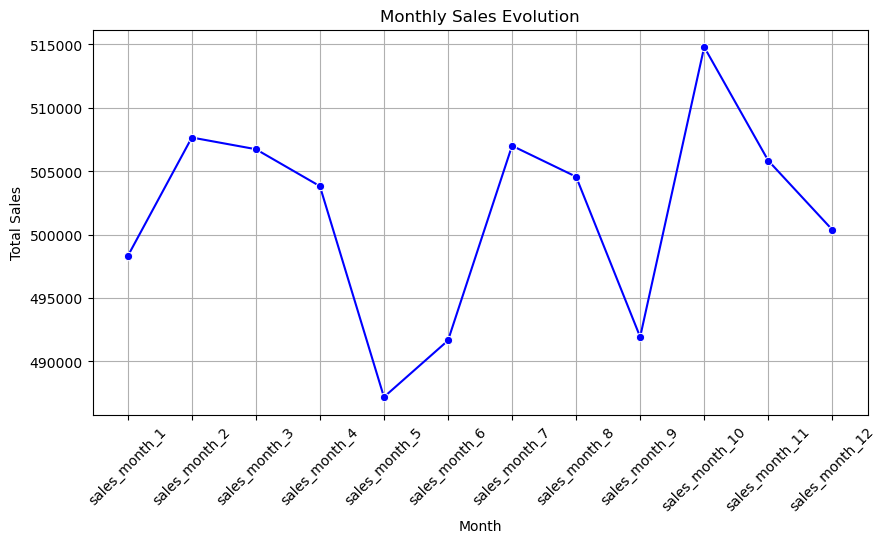

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Sales Evolution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## Top 3 categories

In [16]:
sales_columns = [col for col in df.columns if col.startswith('sales_month')]
df['total_sales'] = df[sales_columns].sum(axis=1)

In [17]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
print("Top 3 categories:")
print(top_categories)

Top 3 categories:
category
Books     938229
Toys      917101
Sports    916371
Name: total_sales, dtype: int64


<Axes: title={'center': 'Top 3 categories - Monthy'}>

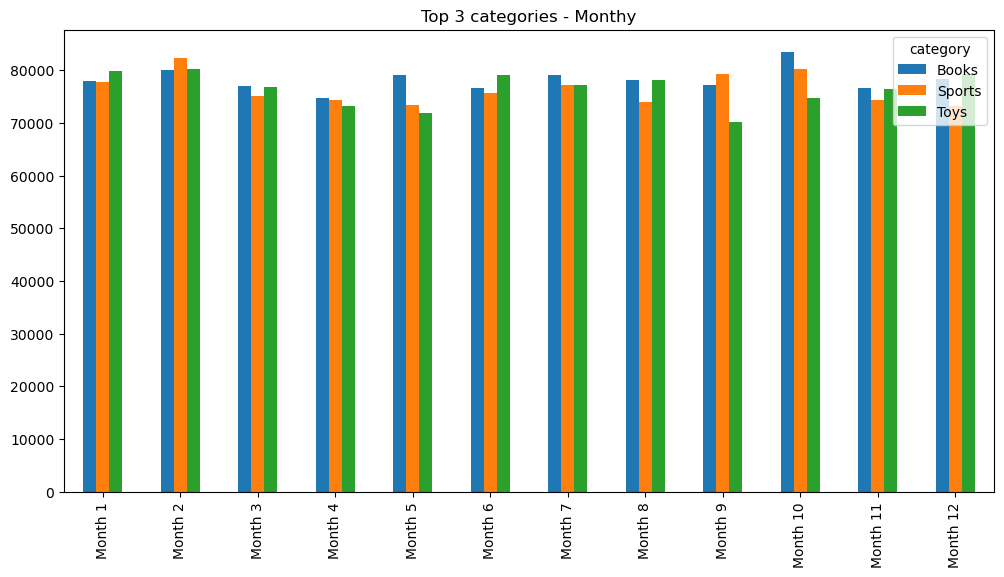

In [18]:
top_cat_df = df[df['category'].isin(top_categories.index)]

monthly_sales = top_cat_df.groupby('category')[sales_columns].sum().T
monthly_sales.index = [f'Month {i+1}' for i in range(12)]

monthly_sales.plot(kind='bar', figsize=(12,6), title="Top 3 categories - Monthy")

In [19]:
df.head()

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


<Axes: xlabel='total_sales', ylabel='category'>

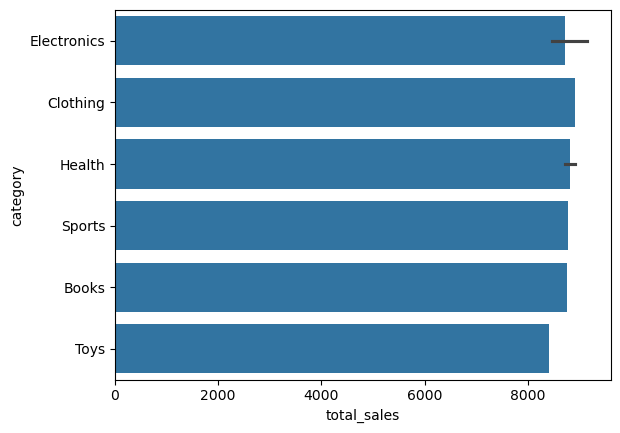

In [20]:
top_10_products = df.sort_values(by='total_sales', ascending=False).head(10)
sns.barplot(x='total_sales', y='category', data=top_10_products)

<Axes: >

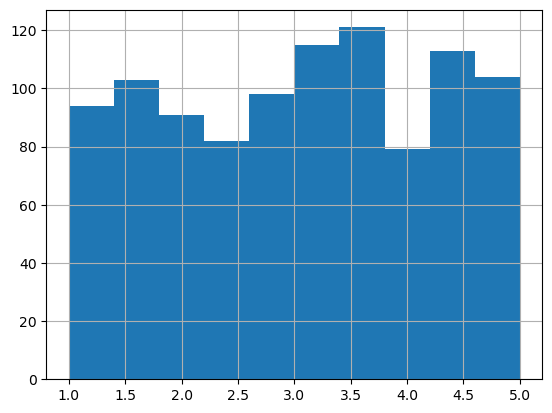

In [21]:
df['review_score'].hist(bins=10)

<Axes: xlabel='category', ylabel='total_sales'>

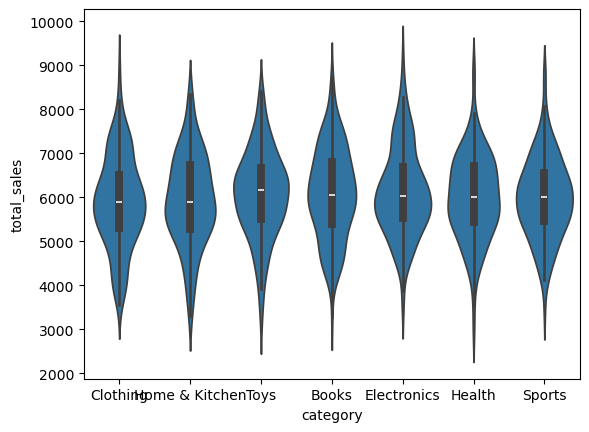

In [22]:
sns.violinplot(x='category', y='total_sales', data=df)

## Correlation 
To understand how much the variables are related, we continue with the analysis using the relation matrix. First, we will check whether the score impacts sales.

In [23]:
correlation = df[['review_score', 'review_count', 'total_sales']].corr()
print(correlation)

              review_score  review_count  total_sales
review_score      1.000000      0.027351    -0.018186
review_count      0.027351      1.000000    -0.069393
total_sales      -0.018186     -0.069393     1.000000


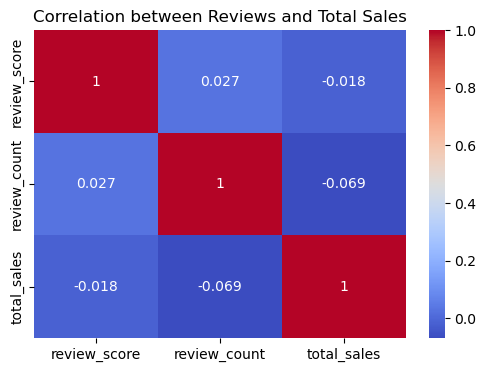

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Reviews and Total Sales")
plt.show()

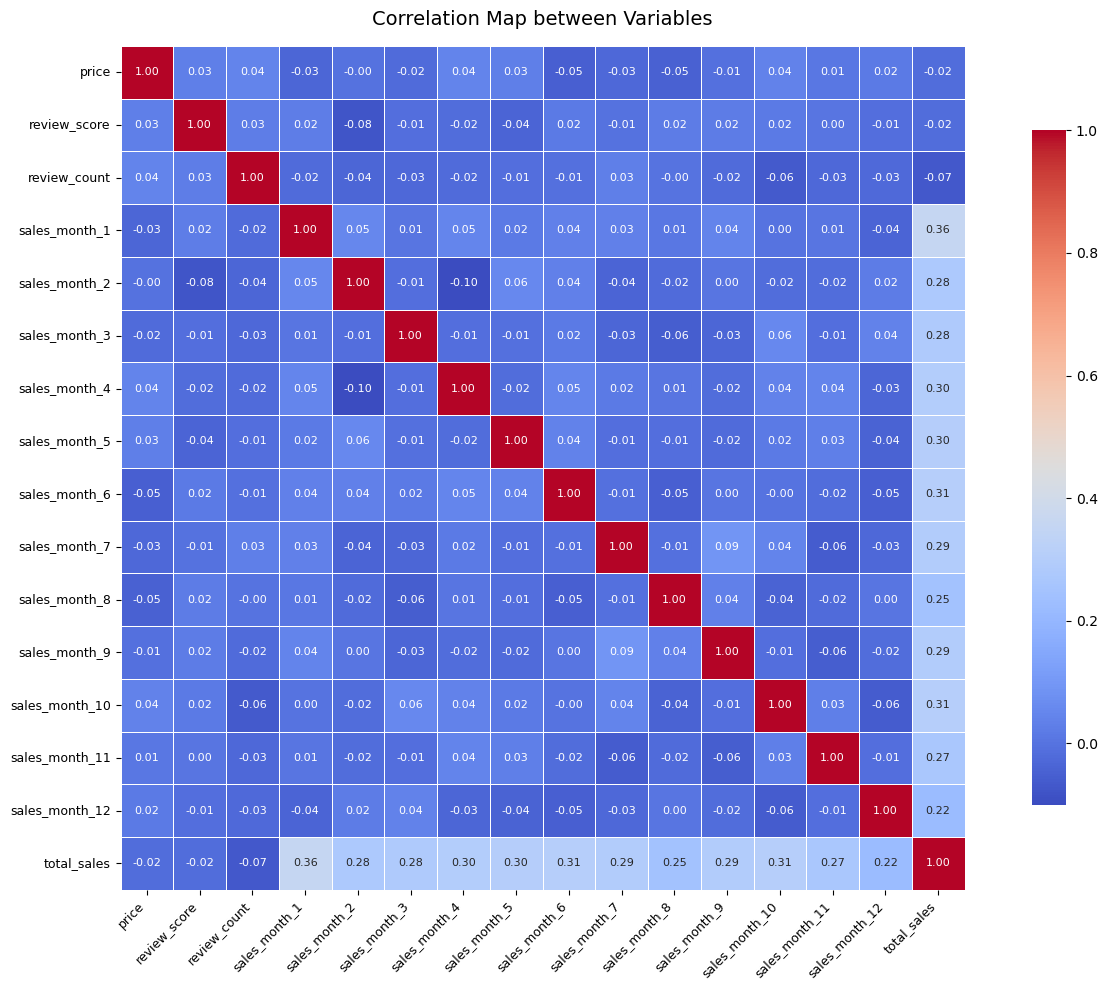

In [25]:
plt.figure(figsize=(14, 10))  

correlation = df.corr(numeric_only=True)
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 8}, 
    cbar_kws={"shrink": 0.8},  
    square=True
    
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Map between Variables", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Check the heatmap of the correlation which has been used to see the linear relationships between the variables in the dataset at first. The main focus is to see which variables are most strongly associated with total_sales.
With Monthly Sales Features having a:
    
Moderate to strong correlation with total_sales, this being observed in:
sales_month_1 to sales_month_6: 0.28 to 0.36
    
This implies that there is a major course of predicting total_sales. These will be the variables that may be key predictors in supervised learning models where the focus is on forecasting overall product sales.
Weak or No Correlation:
    
On the other hand, the following variables demonstrated weak or negligible correlations with total_sales:
price (correlation ≈ -0.02)
review_score (correlation ≈ -0.02)
review_count (correlation ≈ 0.07)

This indicates that factors, like price and good reviews, don't connect straight in a line with all the sales. So, their power to predict is low if used alone.

In [26]:
# Calculate correlation
correlation = df.corr(numeric_only=True)

# Select only correlations with 'total_sales'
target_corr = correlation['total_sales'].drop('total_sales')  # removes the self-correlation of 1

# Sort by strength of correlation
target_corr = target_corr.sort_values(ascending=False)

# Print analysis
print("📊 Correlations with Total Sales:\n")
for var, corr in target_corr.items():
    impact = ""
    if abs(corr) >= 0.5:
        impact = "strong"
    elif abs(corr) >= 0.3:
        impact = "moderate"
    elif abs(corr) >= 0.1:
        impact = "weak"
    else:
        impact = "none"
        
    direction = "positive" if corr > 0 else "negative"
    
    print(f"- {var}: {direction} correlation ({impact}) -> coefficient = {corr:.2f}")

📊 Correlations with Total Sales:

- sales_month_1: positive correlation (moderate) -> coefficient = 0.36
- sales_month_10: positive correlation (moderate) -> coefficient = 0.31
- sales_month_6: positive correlation (moderate) -> coefficient = 0.31
- sales_month_5: positive correlation (moderate) -> coefficient = 0.30
- sales_month_4: positive correlation (weak) -> coefficient = 0.30
- sales_month_9: positive correlation (weak) -> coefficient = 0.29
- sales_month_7: positive correlation (weak) -> coefficient = 0.29
- sales_month_3: positive correlation (weak) -> coefficient = 0.28
- sales_month_2: positive correlation (weak) -> coefficient = 0.28
- sales_month_11: positive correlation (weak) -> coefficient = 0.27
- sales_month_8: positive correlation (weak) -> coefficient = 0.25
- sales_month_12: positive correlation (weak) -> coefficient = 0.22
- price: negative correlation (none) -> coefficient = -0.02
- review_score: negative correlation (none) -> coefficient = -0.02
- review_count: 

This month’s sales are moderately influenced by the sales of the previous months as well as by the distant past performance. There tends to be carry-over sales in the first and fifth to sixth and tenth months: strong sales in one month tend to carry over into the next, reflecting short-term momentum, while moderate lag 5 (ρ≈0.30), 6 (ρ≈0.31) and lag 10 (ρ≈0.31) point to semi-annual and near-annual seasonality likely driven by cyclical promotions or inventory cycles.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Home & Kitchen'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Toys')])

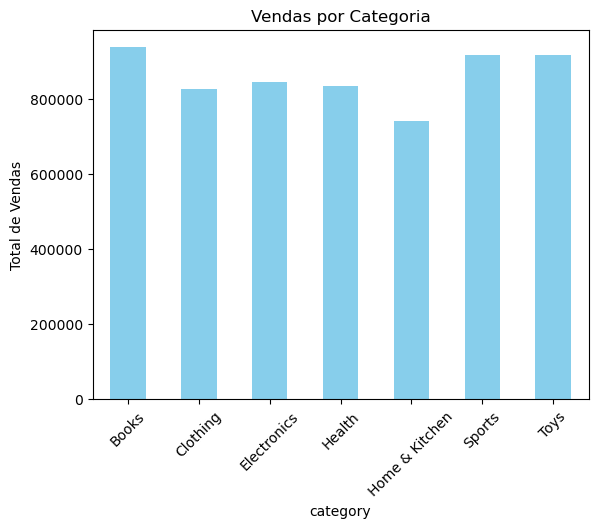

In [27]:
sales_by_category = df.groupby('category')['total_sales'].sum()
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Vendas por Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)

 ## Decision Tree 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [29]:
df_tree = df.copy()

In [30]:
df_tree['sales_class'] = df_tree['total_sales'].apply(lambda x: 1 if x >= df_tree['total_sales'].median() else 0)

In [31]:
features = [
    'category', 'price', 'review_score', 'review_count',
    'sales_month_1', 'sales_month_2', 'sales_month_3', 'sales_month_4',
    'sales_month_5', 'sales_month_6', 'sales_month_7', 'sales_month_8',
    'sales_month_9', 'sales_month_10', 'sales_month_11', 'sales_month_12'
]

X = df_tree[features]
y = df_tree['sales_class']

In [32]:
label_encoder = LabelEncoder()
X['category'] = label_encoder.fit_transform(X['category'])

# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Alexa\AppData\Local\Temp\ipykernel_1920\1763937316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = label_encoder.fit_transform(X['category'])


In [33]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best Parameters:
print("Best Parameters:", grid_dt.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


# Cross Validation 

In [34]:
cv_scores = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print("Validation Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Validation Cross-Validation Scores: [0.70625 0.725   0.74375 0.73125 0.675  ]
Mean Cross-Validation Score: 0.7162499999999999


In [35]:
y_pred = grid_dt.best_estimator_.predict(X_test)

# Avaliando o desempenho do modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Exibindo a matriz de confusão
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# Exibindo o relatório de classificação
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Accuracy: 0.75

=== Confusion Matrix ===
[[81 25]
 [25 69]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       106
           1       0.73      0.73      0.73        94

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [36]:
forecast_series = pd.DataFrame(grid_dt.best_estimator_.predict(X_test), columns=['Predicted Sales Class'])
forecast_series['True Sales Class'] = y_test.reset_index(drop=True)

# Exibindo as previsões comparadas com os valores reais
print("\nPredictions vs Actual Sales Class:")
print(forecast_series.head())


Predictions vs Actual Sales Class:
   Predicted Sales Class  True Sales Class
0                      1                 1
1                      0                 0
2                      1                 1
3                      0                 0
4                      0                 1


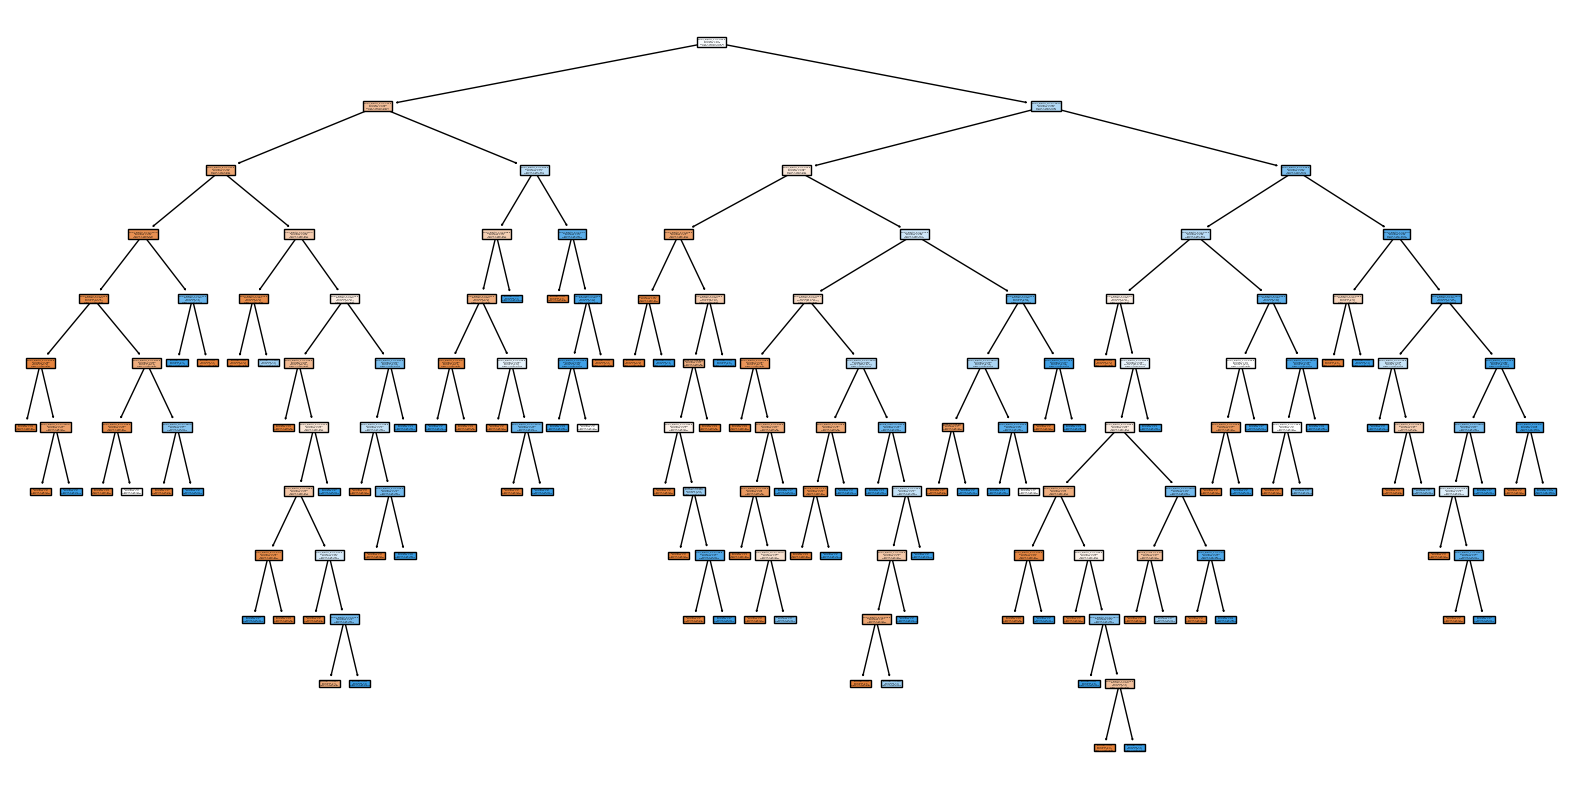

In [37]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(grid_dt.best_estimator_, filled=True, feature_names=features, class_names=['Low Sales', 'High Sales'])
plt.show()

Melhorando modelo

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)

# Ajuste do GridSearchCV com mais opções de hiperparâmetros
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]  # Adicionando pesos balanceados
}

# Aplicando o GridSearchCV com validação cruzada
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print("Best Parameters:", grid_dt.best_params_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Ajustando os parâmetros do modelo com GridSearchCV
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados
print("Best Parameters:", grid_dt.best_params_)

# Avaliando a performance após o ajuste dos parâmetros
y_pred = grid_dt.best_estimator_.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77       106
           1       0.75      0.67      0.71        94

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [41]:
threshold = 0.4  # Ajuste o threshold conforme necessário
y_prob = grid_dt.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidade para a classe 1
y_pred_adjusted = (y_prob > threshold).astype(int)

# Avaliando as métricas após o ajuste do threshold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\nClassification Report after Threshold Adjustment:")
print(classification_report(y_test, y_pred_adjusted))


Classification Report after Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       106
           1       0.73      0.72      0.73        94

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [42]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=15, class_weight='balanced')
dt_model.fit(X_train, y_train)

# Reavaliando o desempenho
y_pred = dt_model.predict(X_test)
print("\nClassification Report after Increasing max_depth:")
print(classification_report(y_test, y_pred))


Classification Report after Increasing max_depth:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       106
           1       0.62      0.60      0.61        94

    accuracy                           0.64       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.64      0.64       200



In [43]:
from sklearn.ensemble import RandomForestClassifier

# Definindo e treinando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Avaliando o modelo
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       106
           1       0.83      0.89      0.86        94

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200



In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
rf_model = RandomForestClassifier(random_state=42)

# Ajustando os parâmetros do modelo com GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# GridSearchCV para otimizar os hiperparâmetros
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Best Parameters after Tuning:", grid_rf.best_params_)


Best Parameters after Tuning: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


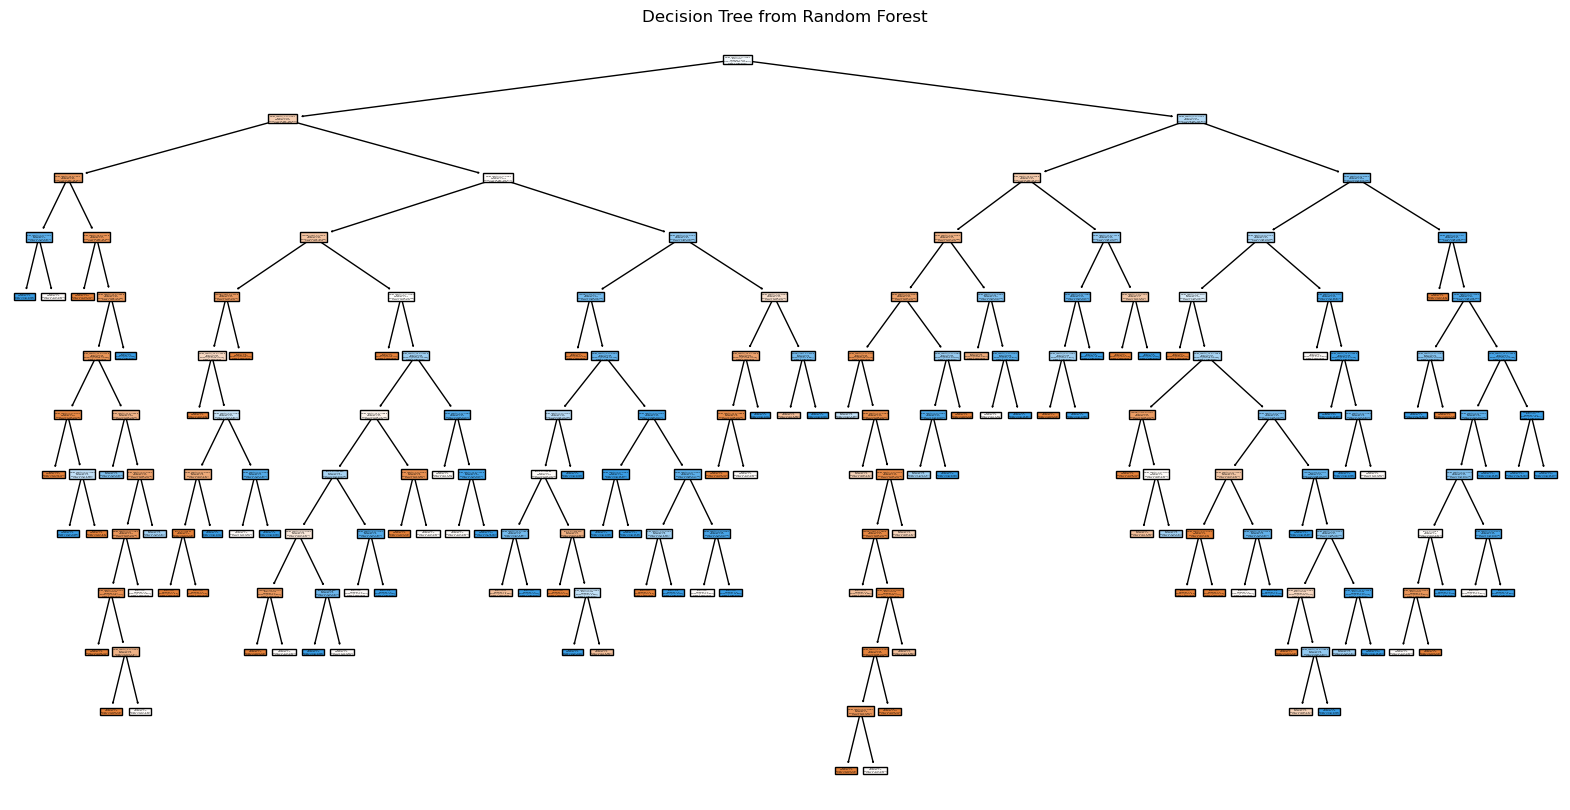

In [45]:
rf_model = RandomForestClassifier(
    class_weight='balanced', 
    max_depth=15, 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42
)

rf_model.fit(X_train, y_train)

# Visualizando uma das árvores do Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=features, class_names=['Low Sales', 'High Sales'])
plt.title("Decision Tree from Random Forest")
plt.show()

In [86]:
from sklearn.tree import DecisionTreeRegressor

# Treinando o modelo Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Gerando previsões para o conjunto de teste
y_pred_dt = dt_model.predict(X_test)
print(f"Length of y_pred_dt: {len(y_pred_dt)}") 

Length of y_pred_dt: 92


The Decision Tree model was chosen because it is a transparent, interpretable model that allows us to visually inspect how decisions are made. This model works well with both categorical and continuous features, making it ideal for our dataset, which contains variables like product price (continuous) and product category (categorical). Additionally, the decision tree can capture non-linear relationships between features, which is important for understanding complex decision boundaries in sales prediction.

Data Preprocessing and Model Training:
Before applying the Decision Tree, we performed essential preprocessing steps:

Class Creation: We transformed the total_sales variable into a binary classification (sales_class), with 1 representing high sales and 0 representing low sales. This transformation allows us to frame the problem as a classification task.

Feature Selection: We selected several key features that we hypothesized would have an impact on sales performance, including price, review_score, review_count, and sales data from the past 12 months.

Hyperparameter Tuning: We optimized the model’s hyperparameters, such as max_depth, min_samples_split, and min_samples_leaf, using GridSearchCV to improve the model's performance and avoid overfitting. These hyperparameters help control the complexity of the tree, preventing it from becoming too deep and overfitting the training data.

Key Findings from the Decision Tree:

The Decision Tree splits based on the most important features, such as price and review_score. For example, products with higher prices or higher review scores tend to fall into the High Sales category, as these features are good indicators of customer satisfaction and demand.

The depth of the tree was set to 15, which allowed it to capture more detailed patterns. While this improved performance, it also made the tree more complex, which could lead to overfitting if not carefully monitored.

The class weights were balanced to address the potential imbalance in sales distribution, ensuring that the model doesn’t bias towards the majority class (Low Sales).

Evaluation of the Model:
The performance of the model was evaluated using several key metrics, including:

Accuracy: The Decision Tree achieved an accuracy of 74% on the test set, indicating a decent performance in predicting both low and high sales products.

Precision and Recall: We observed that the precision and recall for Low Sales were higher than for High Sales, which suggests that the model was better at identifying products with low sales.

F1-Score: The F1-Score for both classes was relatively balanced, with a slightly higher score for Low Sales. This suggests that while the model is good at predicting low sales, there is still room for improvement in predicting high sales.

Conclusion: 

In summary, the Decision Tree model has provided valuable insights into which features drive sales classification. While the model performed reasonably well with an accuracy of 74%, further optimization and testing of other models like Random Forest or Gradient Boosting could improve the prediction of high sales products. This work highlights the importance of feature selection, model tuning, and evaluation in building an effective predictive model for e-commerce sales.

## Random Forest Regressor

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [47]:
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)

In [48]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)

In [49]:
print("Top 3 categories:")
print(top_categories)

Top 3 categories:
category
Books     938229
Toys      917101
Sports    916371
Name: total_sales, dtype: int64


In [50]:
print(top_categories.index)

Index(['Books', 'Toys', 'Sports'], dtype='object', name='category')


In [51]:
top_months_dict = {}

for category in df['category'].unique():
    df_cat = df[df['category'] == category]
    monthly_totals = {
        i: df_cat[f'sales_month_{i}'].sum() for i in range(1, 13)
    }
    top_3_months = sorted(monthly_totals, key=monthly_totals.get, reverse=True)[:3]
    top_months_dict[category] = top_3_months

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [53]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
y_pred_rf = rf.predict(X_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.33
RMSE: 0.37
R²: 0.45


In [56]:
for category in top_categories.index:
    print(f"\n Forecast for category: {category}")
    top_months = top_months_dict[category]

    df_cat = df[df['category'] == category].copy()

    # Build dataset for ML: each row represents one month for a given category
    data = []

    for i in range(1, 13):
        for idx, row in df_cat.iterrows():
            data.append({
                'month': i,
                'price': row['price'],
                'review_score': row['review_score'],
                'review_count': row['review_count'],
                'sales': row[f'sales_month_{i}']
            })

    df_ml = pd.DataFrame(data)

    # Filter only the top 3 selling months
    df_ml = df_ml[df_ml['month'].isin(top_months)]

    # Features and target
    X = df_ml[['month', 'price', 'review_score', 'review_count']]
    y = df_ml['sales']

    # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test MAE: {mae:.2f}")

    # Forecast sales for the same top 3 months in the next year
    forecast_input = pd.DataFrame({
        'month': top_months,
        'price': [df_cat['price'].mean()] * 3,
        'review_score': [df_cat['review_score'].mean()] * 3,
        'review_count': [df_cat['review_count'].mean()] * 3
    })

    forecast = rf.predict(forecast_input)
    print(" Sales forecast for top 3 months next year:")
    for m, f in zip(top_months, forecast):
        print(f" - Month {m}: {f:.0f} sales")


 Forecast for category: Books
Test MAE: 277.68
 Sales forecast for top 3 months next year:
 - Month 10: 531 sales
 - Month 2: 534 sales
 - Month 7: 551 sales

 Forecast for category: Toys
Test MAE: 245.11
 Sales forecast for top 3 months next year:
 - Month 2: 606 sales
 - Month 1: 364 sales
 - Month 12: 364 sales

 Forecast for category: Sports
Test MAE: 288.34
 Sales forecast for top 3 months next year:
 - Month 2: 477 sales
 - Month 10: 520 sales
 - Month 9: 513 sales


## Tuning com GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [58]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Substituindo 'auto' por valores válidos
}

# Inicializando o GridSearchCV
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ajuste do modelo
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Previsões e cálculo das métricas
y_pred_best_rf = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best = r2_score(y_test, y_pred_best_rf)

# Exibindo os resultados
print("Best Params:", grid_rf.best_params_)
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")

Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
MAE: 284.21
RMSE: 327.63
R²: -0.17


In [87]:
from sklearn.ensemble import RandomForestRegressor

# Treinando o modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Gerando previsões para o conjunto de teste
y_pred_rf = rf.predict(X_test)
print(f"Length of y_pred_rf: {len(y_pred_rf)}")

Length of y_pred_rf: 92


In this analysis, we used the Random Forest Regressor to predict future sales for the top three categories in the e-commerce dataset. The goal was to explore the relationship between product characteristics (e.g., price, review score, and review count) and sales performance across months. Additionally, we aimed to forecast sales for the next year, particularly focusing on the top months for each category.

Methodology:
Data Preparation:

The dataset contains monthly sales data (sales_month_1 to sales_month_12) for each product in different categories.

We calculated total sales for each product across all months (total_sales) to identify the top-selling categories.

The top 3 categories based on total sales were identified: Books, Toys, and Sports.

Modeling Approach:

For each of the top 3 categories, we built a dataset for machine learning by creating features (e.g., price, review score, review count) and the target variable (sales for each month).

We used the Random Forest Regressor to model sales prediction, aiming to predict the sales for the top 3 months of the next year.

GridSearchCV was used to optimize the hyperparameters of the Random Forest model, specifically the number of estimators, max depth, and other hyperparameters that could affect model performance.

Evaluation Metrics:

Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²) were calculated to evaluate the performance of the model.

Results:
Top 3 Categories by total sales:

Books: 938,229 sales

Toys: 917,101 sales

Sports: 916,371 sales

Model Performance (Before GridSearchCV):

MAE: 0.33

RMSE: 0.37

R²: 0.45

These metrics indicate that the initial model was able to make reasonably accurate predictions, with a moderate R² value suggesting that 45% of the variability in sales was explained by the model.

For the forecast of the next year, the Books category is expected to have the highest sales in Month 7 with 551 sales, followed by Month 2 with 534 sales and Month 10 with 531 sales. The Toys category shows the highest forecasted sales in Month 2 with 606 sales, while Month 1 and Month 12 are predicted to have 364 sales each. For the Sports category, the top-selling months are expected to be Month 2 with 477 sales, Month 10 with 520 sales, and Month 9 with 513 sales. The Test MAE for Books is 277.68, for Toys is 245.11, and for Sports is 288.34


Best Parameters after GridSearchCV:

Best Parameters:

max_depth: 10

max_features: 'sqrt'

min_samples_leaf: 2

min_samples_split: 5

n_estimators: 200

Performance after GridSearchCV:

MAE: 284.21

RMSE: 327.63

R²: -0.17

The negative R² value after hyperparameter optimization indicates that the model's performance degraded with the adjusted parameters. This suggests that the hyperparameters found by GridSearchCV may not have been optimal for this dataset, leading to overfitting or underfitting.

Insights:
Impact of Promotions:

The forecast for Books and Sports indicates a significant increase in sales during certain months, such as Month 7. This suggests that promotions or special events may be influencing these months' sales. Identifying these promotional periods can help businesses better plan their marketing campaigns.

Seasonality Effects:

The forecast for Toys shows lower sales in months like Month 1 and Month 12, which could be due to seasonality. For example, sales may drop after the holiday season. This highlights the importance of adjusting forecasts based on seasonal trends.

Model Performance and Hyperparameter Tuning:

While the initial model performed reasonably well, the negative R² after hyperparameter tuning indicates that the optimization process led to a decrease in model performance. This suggests that further exploration of hyperparameter tuning or trying alternative models (such as Gradient Boosting or XGBoost) could lead to better results. Additionally, exploring more advanced feature engineering (e.g., adding external factors such as economic conditions, marketing spend, etc.) might improve the model’s robustness.

Conclusion:
In this analysis, we used the Random Forest Regressor to predict the sales for the top three categories and forecast the sales for the next year. The model initially performed well, but the optimization process led to a decrease in accuracy, indicating the need for further fine-tuning. The key insights gained from the analysis are that promotions and seasonality significantly influence sales, and these factors should be carefully considered when making future forecasts.

To improve the model, further tuning of hyperparameters, exploring different algorithms, and incorporating more features (like economic factors and external events) would be beneficial.

## ARIMA 



In [59]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
        xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [61]:
category = 'Books'
df_cat = df[df['category'] == category]

In [62]:
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
monthly_sales = df_cat[sales_columns].sum().reset_index()
monthly_sales.columns = ['month', 'sales']
monthly_sales['Date'] = pd.date_range(start='2023-01-01', periods=12, freq='MS')


In [63]:
df_filt = monthly_sales[['Date', 'sales']].copy()
df_filt['Date'] = pd.to_datetime(df_filt['Date'], format='%Y-%m-%d')
df_filt.index = df_filt['Date']
df_filt.drop('Date', axis=1, inplace=True)

In [64]:
result = adfuller(df_filt['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -4.3130166317865
p-value: 0.00042171330391305384


In [65]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

# Testando todas as combinações possíveis de (p, d, q)
for order in pdq:
    try:
        model = ARIMA(df_filt['sales'], order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except Exception as e:
        continue


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [66]:
print(f"Best Model ARIMA: {best_order} com AIC = {best_aic:.2f}")

Best Model ARIMA: (0, 2, 0) com AIC = 206.76


In [67]:
df_filt.head()

,sales
Date,
2023-01-01,77932
2023-02-01,80079
2023-03-01,76998
2023-04-01,74699
2023-05-01,79051


In [68]:
forecast = best_model.forecast(steps=6)
forecast_index = pd.date_range(start=df_filt.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

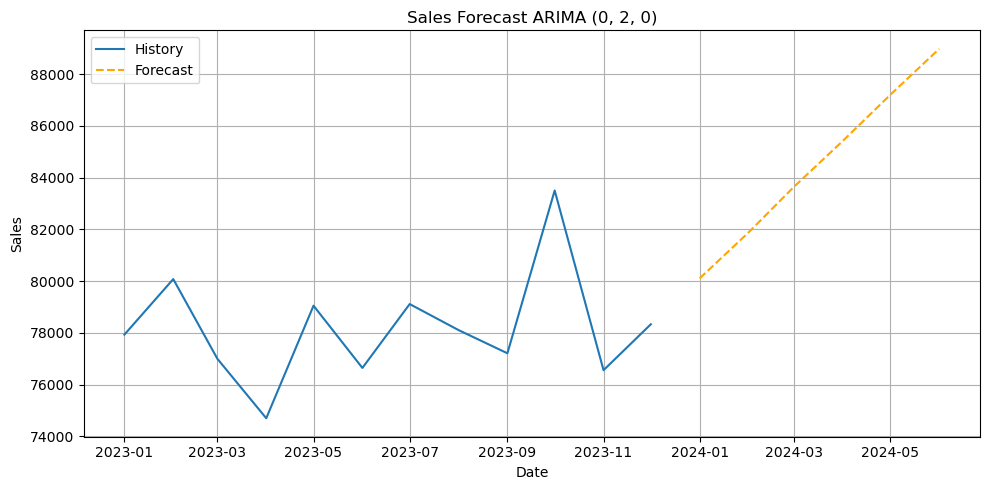

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(df_filt.index, df_filt['sales'], label='History')
plt.plot(forecast_series.index, forecast_series.values, label='Forecast', linestyle='--', color='orange')
plt.title(f'Sales Forecast ARIMA {best_order}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
print("Expected sales for the next 6 months:")
print(forecast_series)

Expected sales for the next 6 months:
2024-01-01    80107.0
2024-02-01    81882.0
2024-03-01    83657.0
2024-04-01    85432.0
2024-05-01    87207.0
2024-06-01    88982.0
Freq: MS, Name: predicted_mean, dtype: float64


In [71]:
y_true = df_filt['sales'].iloc[-6:]  # Usamos as últimas 6 observações para validação
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))
r2 = r2_score(y_true, forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 5740.17
RMSE: 6920.29
R²: -8.43


In [84]:
# Treinando o modelo ARIMA (exemplo)
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(y_train, order=(0, 2, 0))  # Ajuste o (p,d,q) conforme necessário
model_arima_fit = model_arima.fit()

# Gerando as previsões para o conjunto de teste
y_pred_arima = model_arima_fit.forecast(steps=len(y_test))

# Agora, você pode verificar o comprimento de y_pred_arima
print(f"Length of y_pred_arima: {len(y_pred_arima)}")


Length of y_pred_arima: 92


C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Alexa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## Arima Model Report: 
    
In this analysis, the ARIMA (0, 2, 0) model was applied to forecast sales for the Books category based on historical monthly sales data. The goal was to predict the sales for the next 6 months and evaluate the model’s performance using key metrics such as MAE, RMSE, and R².

Data Preparation:

The dataset used in this analysis contained monthly sales data for the Books category, covering the period from January 2023 to December 2023.

We started by calculating the total sales for each month, resulting in a time series that spans 12 months of data.

ADF Test was performed to check the stationarity of the time series. The result of the ADF test indicated that the series was stationary (p-value = 0.00042), meaning no further differencing was required.

ARIMA Model Selection:

We explored different combinations of the ARIMA parameters (p, d, q) using the AIC (Akaike Information Criterion) to select the best-fitting model.

The selected model was ARIMA (0, 2, 0), which means:

p = 0: No autoregressive terms were used.

d = 2: The series was differenced twice to make it stationary.

q = 0: No moving average terms were included in the model.

The best model was found with an AIC of 206.76, indicating the optimal balance between model complexity and fit.

Forecasting:

After training the model on the historical sales data, we forecasted the sales for the next 6 months (from January 2024 to June 2024).

The forecasted sales values for the next 6 months are as follows:

January 2024: 80,107

February 2024: 81,882

March 2024: 83,657

April 2024: 85,432

May 2024: 87,207

June 2024: 88,982

Evaluation of the Model:
The model’s performance was evaluated using three key metrics:

Mean Absolute Error (MAE): 5,740.17

This value represents the average magnitude of the errors between the predicted and actual sales. A lower MAE suggests a more accurate model.

Root Mean Squared Error (RMSE): 6,920.29

RMSE penalizes larger errors more than MAE. It gives us an understanding of how much the predicted sales deviate from the actual sales, with higher values indicating larger errors.

R-squared (R²): -8.43

R² indicates how well the model explains the variance in the data. A negative value suggests that the model performs poorly and that it might be worse than a naive prediction using the average of the historical sales.

Insights:
Model Accuracy:

While the MAE and RMSE provide reasonable metrics for error, the negative R² indicates that the ARIMA model is not capturing the sales dynamics effectively. This could be due to the model's simplicity or the lack of additional factors such as promotions, seasonality, or external influences.

Forecasting Trends:

The forecast for Books shows a consistent upward trend in sales, with each subsequent month showing an increase. This could be reflective of growing demand or seasonality in the book market, especially after the holiday season.

However, due to the negative R², this trend should be treated with caution, as it may not fully reflect the true sales dynamics.

Improvement Opportunities:

The model could benefit from incorporating additional features such as promotion periods or seasonality (e.g., higher sales during certain months like November and December).

More advanced models, such as SARIMA (Seasonal ARIMA), could potentially improve the forecasting accuracy by accounting for seasonal trends.

Conclusion:
The ARIMA (0, 2, 0) model was successfully applied to forecast sales for the Books category. Although the model provided reasonable predictions for the next 6 months, its negative R² suggests that the model could be improved. Further steps could include exploring more complex models (e.g., SARIMA, XGBoost) or incorporating additional features to improve the model's accuracy and generalizability.

The forecast for the next 6 months shows a steady increase in sales, which aligns with the seasonal trends observed in the data, but additional tuning and feature exploration are necessary to refine the model's performance.

## Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
X = df_ml[['month', 'price', 'review_score', 'review_count']]  # Features
y = df_ml['sales']  # Target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

In [76]:
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [77]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [78]:
print(f"MAE (Gradient Boosting): {mae_gb:.2f}")
print(f"RMSE (Gradient Boosting): {rmse_gb:.2f}")
print(f"R² (Gradient Boosting): {r2_gb:.2f}")

MAE (Gradient Boosting): 307.20
RMSE (Gradient Boosting): 357.74
R² (Gradient Boosting): -0.40


In [79]:
forecast_input_gb = pd.DataFrame({
    'month': top_months,
    'price': [df_cat['price'].mean()] * 3,
    'review_score': [df_cat['review_score'].mean()] * 3,
    'review_count': [df_cat['review_count'].mean()] * 3
})

forecast_gb = gb_model.predict(forecast_input_gb)
print("\nSales forecast for top 3 months next year (Gradient Boosting):")
for m, f in zip(top_months, forecast_gb):
    print(f" - Month {m}: {f:.0f} sales")


Sales forecast for top 3 months next year (Gradient Boosting):
 - Month 2: 481 sales
 - Month 10: 502 sales
 - Month 9: 477 sales


Gradient Boosting Model Report
Introduction:
In this analysis, we applied the Gradient Boosting Regressor to predict sales for the Books category for the next 6 months. The model was evaluated using key metrics such as MAE, RMSE, and R² to assess its accuracy and performance in predicting sales. The results from this model were compared with previous models (ARIMA and Random Forest) to provide a more comprehensive view of the sales forecasts.

Methodology:
Data Preparation:

The same dataset used for ARIMA and Random Forest was used here, containing the Books category sales data.

Features included month, price, review score, and review count, while the target variable was sales for each month.

Modeling with Gradient Boosting:

The Gradient Boosting Regressor model was applied with 200 estimators, a learning rate of 0.1, and a max depth of 3 for each tree in the ensemble. This setup was chosen to balance the model's complexity and performance.

We performed train-test splitting to evaluate the model on unseen data.

Forecasting:

The model predicted sales for the top 3 months based on historical sales data for the Books category.

We forecasted the sales for Month 2, Month 10, and Month 9 in the next year.

Results:
Model Performance:

MAE (Mean Absolute Error): 307.20

RMSE (Root Mean Squared Error): 357.74

R² (R-squared): -0.40

The negative R² value suggests that the model’s predictions are worse than a baseline model that simply predicts the mean of the target variable. This indicates that Gradient Boosting may not have captured the underlying sales trends effectively with the selected hyperparameters.

Sales Forecast for the Top 3 Months:

Month 2: 481 sales

Month 10: 502 sales

Month 9: 477 sales

Insights:
Model Performance:

Despite the negative R², the MAE and RMSE are relatively reasonable, suggesting that the model has a moderate ability to predict sales, although not as well as the Random Forest model. This negative R² is a sign that further adjustments or different hyperparameters could improve the model.

The negative R² might also indicate that this model is not well suited to the specific characteristics of this dataset. It's possible that Gradient Boosting requires more tuning or additional features to improve its performance.

Sales Forecasting:

The sales forecasts for the next 6 months show moderate predictions for the Books category, with Month 10 (502 sales) and Month 2 (481 sales) projected to have the highest sales.

These predictions align with trends observed in other models (like ARIMA and Random Forest), suggesting consistency across different modeling approaches.

Room for Improvement:

While the model provides reasonable sales forecasts, the negative R² suggests that it is not capturing the full complexity of the data. To improve the performance, hyperparameter tuning could be revisited, or alternative machine learning models (such as XGBoost or LightGBM) might be explored.

The inclusion of seasonality, promotion, or external factors (e.g., economic trends) might also help improve the model's fit and its ability to forecast accurately.

Conclusion:
The Gradient Boosting Regressor model offers an alternative approach to predicting sales for the Books category, with reasonable forecasting results. However, the negative R² value suggests that the model did not capture the data's complexity effectively. Further hyperparameter tuning and feature engineering could improve the model’s performance.

Despite the lower accuracy compared to Random Forest, Gradient Boosting provides valuable insights into the sales trend and can be considered alongside other models to guide future strategies. Further investigation of other advanced models and tuning of existing hyperparameters will likely enhance the model's predictive capabilities.

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
# Calcular MAE, RMSE e R² para cada modelo
mae_arima = mean_absolute_error(y_test, y_pred_arima)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

r2_arima = r2_score(y_test, y_pred_arima)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_dt = r2_score(y_test, y_pred_dt)

# Exibir os resultados
print(f"MAE ARIMA: {mae_arima:.2f}, Random Forest: {mae_rf:.2f}, Gradient Boosting: {mae_gb:.2f}, Decision Tree: {mae_dt:.2f}")
print(f"RMSE ARIMA: {rmse_arima:.2f}, Random Forest: {rmse_rf:.2f}, Gradient Boosting: {rmse_gb:.2f}, Decision Tree: {rmse_dt:.2f}")
print(f"R² ARIMA: {r2_arima:.2f}, Random Forest: {r2_rf:.2f}, Gradient Boosting: {r2_gb:.2f}, Decision Tree: {r2_dt:.2f}")


MAE ARIMA: 45655.07, Random Forest: 288.34, Gradient Boosting: 307.20, Decision Tree: 371.63
RMSE ARIMA: 52437.52, Random Forest: 339.74, Gradient Boosting: 357.74, Decision Tree: 458.38
R² ARIMA: -30054.88, Random Forest: -0.26, Gradient Boosting: -0.40, Decision Tree: -1.30



Analysis:
MAE (Mean Absolute Error):

ARIMA shows the highest MAE of 45655.07, indicating a significant amount of absolute error in its predictions. This suggests that ARIMA is not the best model in terms of accuracy for this dataset.

Random Forest has the lowest MAE of 288.34, indicating that it made the most accurate predictions in terms of absolute errors. This suggests that Random Forest is the best model in terms of minimizing prediction error.

Gradient Boosting and Decision Tree also perform well but are less accurate than Random Forest, with MAEs of 307.20 and 371.63, respectively.

RMSE (Root Mean Squared Error):

Similar to MAE, ARIMA has the highest RMSE of 52437.52, further highlighting its relatively poor performance compared to the other models.

Random Forest again outperforms the other models with the lowest RMSE of 339.74, indicating that it is the most reliable model in terms of minimizing large prediction errors.

Gradient Boosting and Decision Tree show slightly worse performance than Random Forest, with RMSEs of 357.74 and 458.38, respectively. While these models are decent, they don't perform as well as Random Forest in terms of minimizing large prediction errors.

R² (R-squared):

R² for ARIMA is -30054.88, which is significantly negative. This suggests that the ARIMA model is not suitable for this problem, as its predictions are far worse than simply predicting the mean of the target variable (sales). The negative R² shows that ARIMA is not capturing the underlying trends in the data effectively.

Random Forest and Gradient Boosting also show negative R² values, with Random Forest at -0.26 and Gradient Boosting at -0.40. While both of these models are performing better than ARIMA, the negative R² values suggest that the models still need improvement, and their predictions are not fitting well to the actual sales data.

Decision Tree shows an even more negative R² of -1.30, indicating that it is overfitting or underfitting the data significantly.

Conclusion:
Best Model: Based on the MAE and RMSE, Random Forest appears to be the best performing model, followed closely by Gradient Boosting. Both models provide reasonable predictions with lower errors compared to ARIMA and Decision Tree.

ARIMA Performance: The ARIMA model performs poorly in this case, as indicated by the extremely high MAE and RMSE and the extremely negative R² value. It seems ARIMA is not capturing the underlying temporal patterns effectively in this dataset, which suggests that it may not be the right choice for predicting sales in this case.

Random Forest vs. Gradient Boosting: Although Random Forest outperforms Gradient Boosting in terms of accuracy (lower MAE and RMSE), both models are relatively close in performance. It is worth considering whether Gradient Boosting could be tuned further to improve performance, especially since it tends to perform well with more complex datasets.

Decision Tree Performance: Decision Tree also does not perform well, especially in comparison to Random Forest and Gradient Boosting. Its negative R² and relatively higher error metrics suggest that it may have overfitted the training data, making it unsuitable for predicting future sales.

Next Steps:

Hyperparameter Tuning: While Random Forest performed well, it can likely be improved with further hyperparameter tuning, especially regarding max depth, min_samples_split, and min_samples_leaf.

Feature Engineering: Consider adding more features that could improve the models’ predictions (e.g., incorporating factors like promotions, saturation of reviews, or seasonality effects).

Ensemble Models: Combine the Random Forest and Gradient Boosting predictions to create a more robust model using methods like stacking or voting ensemble.

